# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
** Import numpy and pandas **

In [2]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py

** Read in the csv file as a dataframe called df **

In [9]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [12]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

** What are the top 5 townships (twp) for 911 calls?**

In [13]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

**Let's take a look at the 'title' column and see how many unique title codes is in this data**

In [14]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. I'm going to make a new column that only shows the main reason why 911 was called.

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [16]:
df['Reason']= df['title'].apply(lambda title: title.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [18]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

 Now I'm going to use seaborn to create a countplot of 911 calls by Reason. 

<Axes: xlabel='Reason', ylabel='count'>

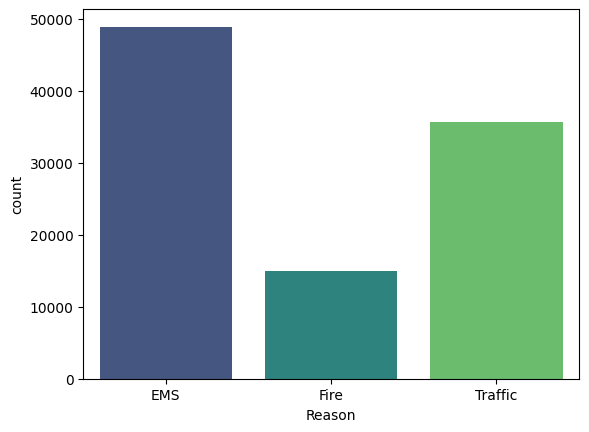

In [20]:
sns.countplot(x='Reason',data=df,palette='viridis', hue='Reason')

___
** Now let us begin to focus on time information. I'm first going to get the data type of the 'timeStamp' column. **

In [24]:
type(df['timeStamp'].iloc[0])

str

** After seeing that the data type is strings i'm going to convert the data type to data and time.**

In [25]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** I can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour


In [26]:
df['Hour']= df['timeStamp'].apply(lambda time: time.hour)
df['Month']= df['timeStamp'].apply(lambda time: time.month)
df['Day of Week']= df['timeStamp'].apply(lambda time: time.dayofweek)

** Notice how the Day of Week is an integer 0-6. I will Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [27]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [28]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Now I will use the seaborn library to create a countplot of the Day of Week column with the hue based off of the Reason column. **

<Axes: xlabel='Day of Week', ylabel='count'>

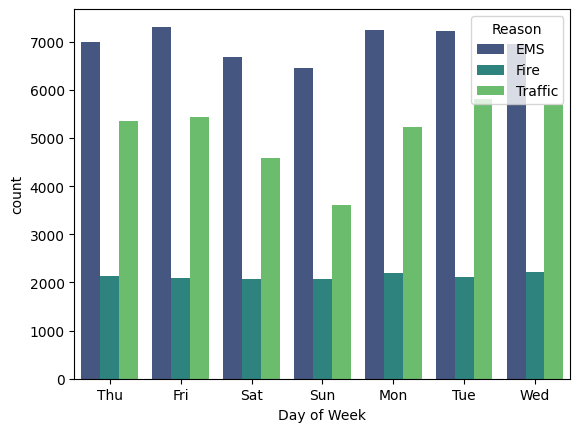

In [29]:
sns.countplot(x= 'Day of Week', data = df, hue= 'Reason', palette='viridis')

**Now I will do the same for Month:**

<Axes: xlabel='Month', ylabel='count'>

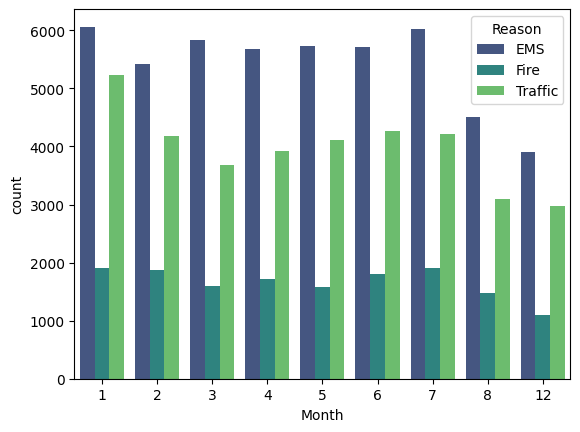

In [30]:
sns.countplot(x= 'Month', data = df, hue= 'Reason', palette='viridis')



**I noticed this plot is missing months 9 through 11.I'm going to see if i can fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas**

** Now I will create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation.**

In [35]:
ByMonth = df.groupby('Month').count().head()
ByMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now  I will create a simple plot off of the dataframe indicating the count of calls per month. **

<Axes: xlabel='Month'>

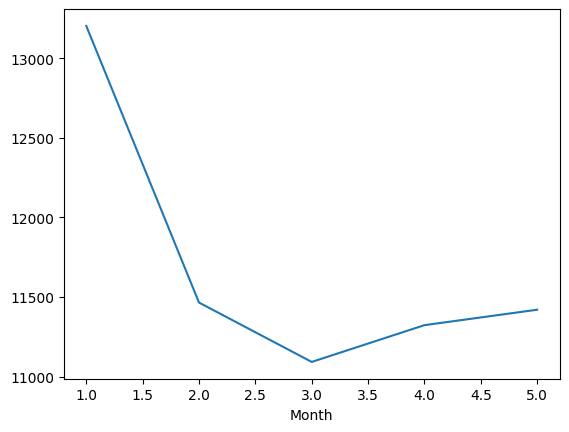

In [36]:
ByMonth['twp'].plot()

** Now I'll see if I can use seaborn's lmplot() to create a linear fit on the number of calls per month. **

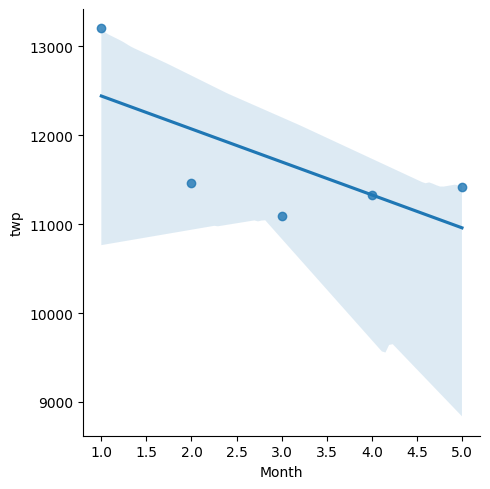

In [37]:
sns.lmplot(x='Month',y='twp',data=ByMonth.reset_index())

**I will create a new column called 'Date'that contains the date from the timeStamp column.**

In [38]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

** Now I will groupby the Date column with the count() aggregate and create a plot of counts of 911 calls.**

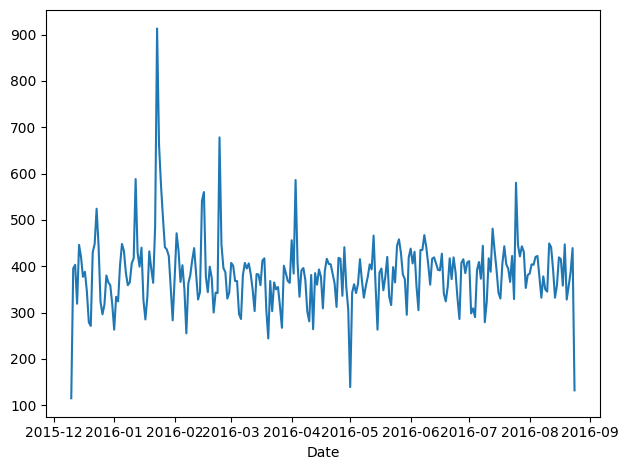

In [40]:
ByDate= df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

 Now I'll recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

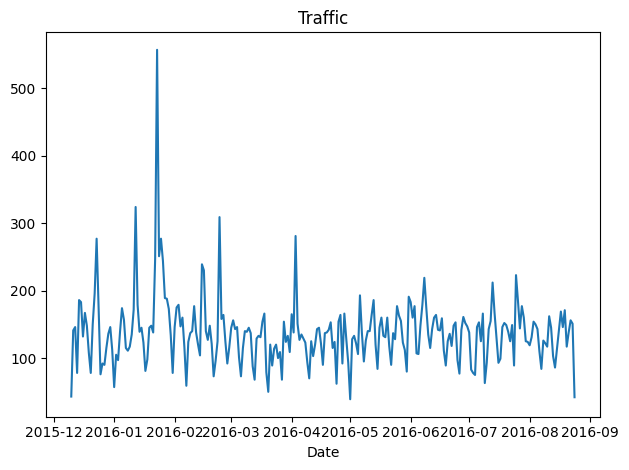

In [41]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

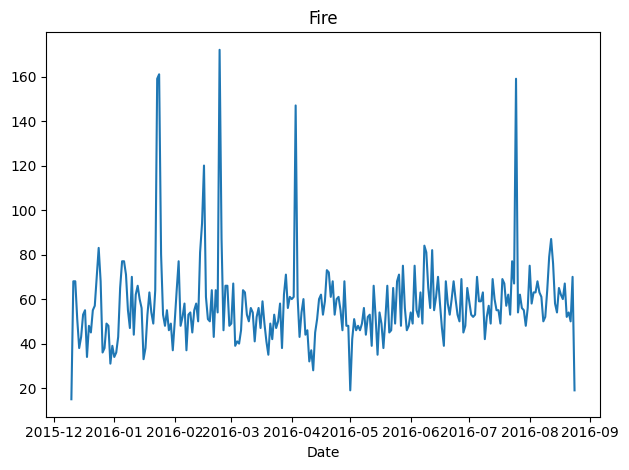

In [46]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

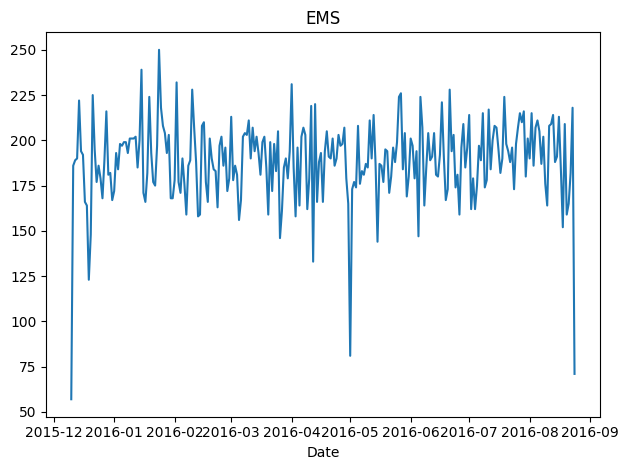

In [49]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now I'll move on to creating heatmaps with seaborn and this data. I'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [51]:
DayHour = df.groupby(by = ['Day of Week','Hour']).count()['Reason'].unstack()
DayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


 Now I'll create a HeatMap using this new DataFrame.

<Axes: xlabel='Hour', ylabel='Day of Week'>

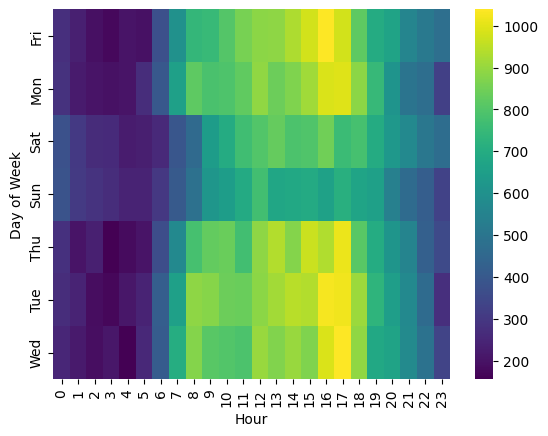

In [52]:
sns.heatmap(DayHour,cmap='viridis')

** Now I'll create a clustermap using this DataFrame. **

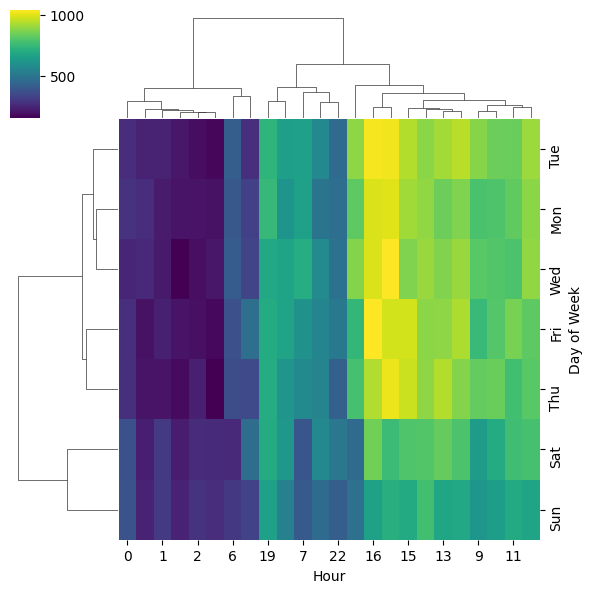

In [55]:
sns.clustermap(DayHour,cmap='viridis', figsize=(6,6))

Now I'll repeat these same plots and operations, for a DataFrame that shows the Month as the column.

In [57]:
DayMonth = df.groupby(by= ['Day of Week','Month']).count()['Reason'].unstack()
DayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='Day of Week'>

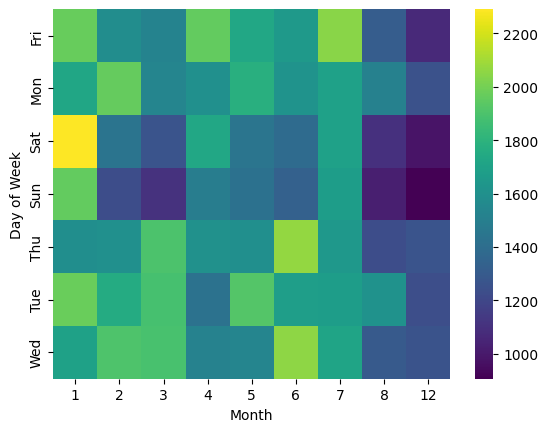

In [58]:
sns.heatmap(DayMonth, cmap='viridis')

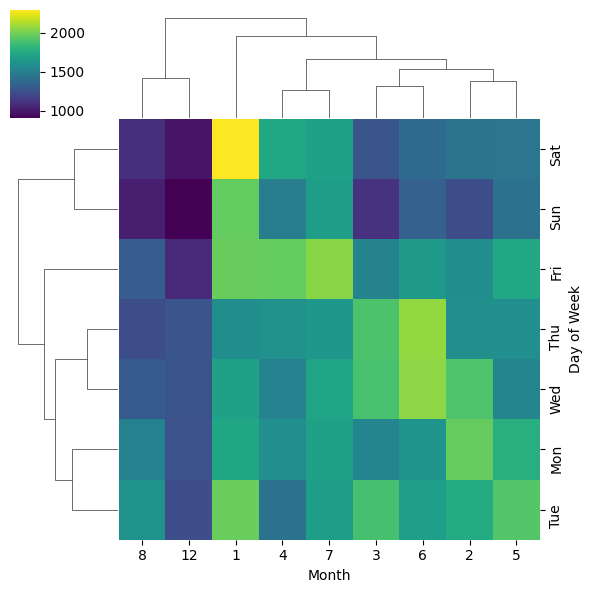

In [59]:
sns.clustermap(DayMonth, cmap='viridis', figsize=(6,6))

<center> Summary <center>

1. We can tell from the data that the five zipcodes with the highest 911 calls are 19401, 19464,19403,19446 and 19406

2. We can also see that EMS takes up the most of the calls to 911

3. We can also see that overall 911 is called mostly in the evening between 2pm and 5pm
